#### Useful imports

In [262]:
#Useful imports 
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl

import seaborn as sn

pd.options.display.max_columns = 500

#### Useful dictionnaries

In [263]:
catégorie = ["Medical, Illness & Healing", "Funerals & Memorials", "Accidents & Emergencies","Non-Profits & Charities","Education & Learning", "Animals & Pets", "Environment", "Business & Entrepreneurs","Community & Neighbors", "Competitions & Pageants","Creative Arts, Music & Film", "Celebrations & Events","Missions, Faith & Church", "Babies, Kids & Family", "Sports, Teams & Clubs", "Travel & Adventure","Volunteer & Service", "Dreams, Hopes & Wishes", "Other"]

dict_category=dict()
for i in range(len(catégorie)):
    dict_category[i]=catégorie[i]

n = len(catégorie)


# ANALYSING

## III.I/Let's look at our data:

In [264]:
df =pd.read_csv('datacleaned.csv')

In [265]:
df.iloc[:,1:11].describe()

,Pourcentage Raised,NumberDonors,Duration in days,Amount collected,Amount targeted,MeanDonation
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,23.472357,27.542351,62.917925,1818.898884,6724.789232,37.076997
std,33.006088,150.903194,70.241477,9312.857964,14111.962904,76.146530
min,1.000000,0.000000,7.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,18.000000,0.000000,1000.000000,0.000000
50%,4.600000,3.000000,44.000000,90.000000,2000.000000,20.000000
75%,33.450000,15.000000,74.000000,664.000000,6000.000000,46.140934
max,100.000000,4704.000000,372.000000,235490.000000,200000.000000,1677.666667


### III.I.1/ 'Duration in days' of collects

In [266]:
df['Duration in days'].describe()

count    1523.000000
mean       62.917925
std        70.241477
min         7.000000
25%        18.000000
50%        44.000000
75%        74.000000
max       372.000000
Name: Duration in days, dtype: float64

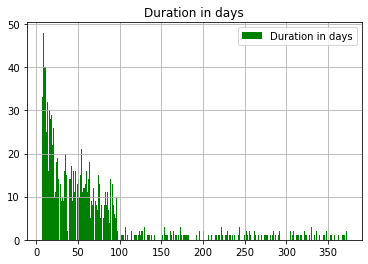

In [267]:
plt=df.hist(column='Duration in days', bins=400, legend=True, color='g')

<AxesSubplot:title={'center':'Mean of duration per category'}, ylabel='Categorie'>

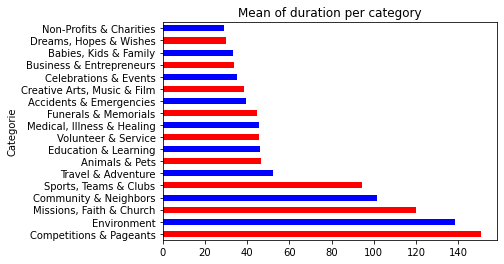

In [320]:
df.groupby('Categorie')['Duration in days'].mean().nlargest(n).plot.barh( color=['r','b'],title='Mean of duration per category')

##### We had selected the 96 'most popular' collects (as presented by the website) for each category
##### They are mostly recent (50% < a month)
##### It's relevant to note that some categories like 'Charities' have a turnover much bigger than 'Missions and Faith' for example

### III.1.2.2/ Amount targeted 

In [269]:
df['Amount targeted'].describe()

count      1523.000000
mean       6724.789232
std       14111.962904
min           1.000000
25%        1000.000000
50%        2000.000000
75%        6000.000000
max      200000.000000
Name: Amount targeted, dtype: float64

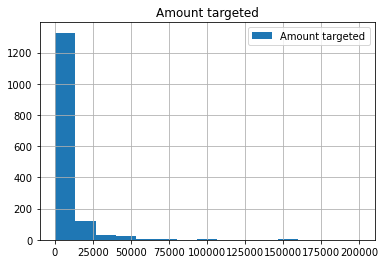

In [270]:
plt=df.hist(column='Amount targeted', bins=15, legend= True);

<AxesSubplot:title={'center':'Means of amount targeted'}, ylabel='Categorie'>

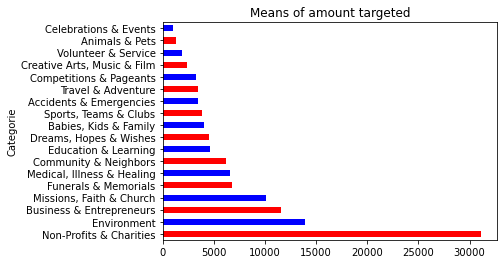

In [321]:
df.groupby('Categorie')['Amount targeted'].mean().nlargest(n).plot.barh(color=['r','b'],title='Means of amount targeted')

### III.1.2.2/ Amount collected 

In [272]:
df['Amount collected '].describe()

count      1523.000000
mean       1818.898884
std        9312.857964
min           0.000000
25%           0.000000
50%          90.000000
75%         664.000000
max      235490.000000
Name: Amount collected , dtype: float64

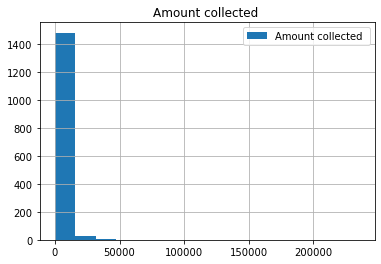

In [273]:
plt=df.hist(column='Amount collected ', bins=15, legend= True);

<AxesSubplot:title={'center':'Means of amount targeted'}, ylabel='Categorie'>

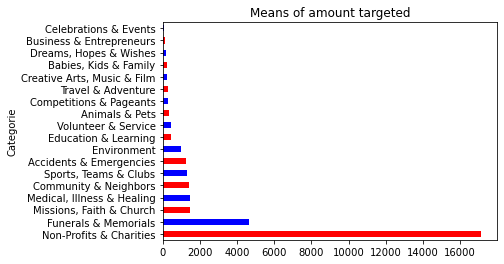

In [322]:
df.groupby('Categorie')['Amount collected '].mean().nlargest(n).plot.barh(color=['r','b'],title='Means of amount targeted')

##### The amount raised depended 

### III.1.3/Analysis of the number of donors

In [275]:
df['NumberDonors'].describe()

count    1523.000000
mean       27.542351
std       150.903194
min         0.000000
25%         0.000000
50%         3.000000
75%        15.000000
max      4704.000000
Name: NumberDonors, dtype: float64

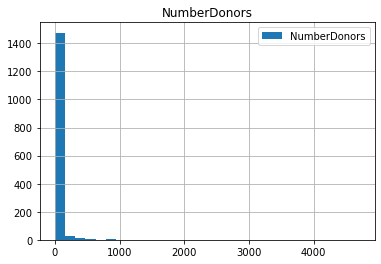

In [276]:
plt=df.hist(column='NumberDonors', bins=30, legend= True);

<AxesSubplot:title={'center':'Means of amount collected'}, ylabel='Categorie'>

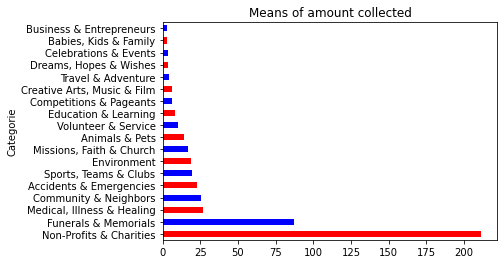

In [323]:
df.groupby('Categorie')['NumberDonors'].mean().nlargest(n).plot.barh(color=['r','b'],title='Means of amount collected')

### III.1.4/ Analysis of the 'Pourcentage raised' of the targeted amount of collects

In [278]:
df['Pourcentage Raised'].describe()

count    1523.000000
mean       23.472357
std        33.006088
min         1.000000
25%         1.000000
50%         4.600000
75%        33.450000
max       100.000000
Name: Pourcentage Raised, dtype: float64

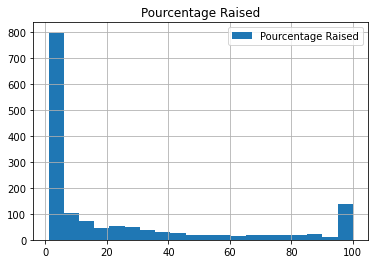

In [279]:
plt=df.hist(column='Pourcentage Raised', bins=20, legend= True);

<AxesSubplot:title={'center':'Means of amount collected'}, ylabel='Categorie'>

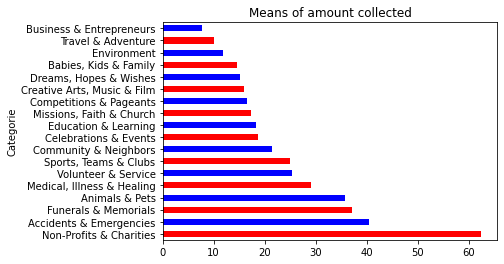

In [324]:
df.groupby('Categorie')['Pourcentage Raised'].mean().nlargest(n).plot.barh(color=['r','b'],title='Means of amount collected')

## III.2/ How can we use the description of a project ?

In [282]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/albandhauthuille/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### III.2.1/ First, collect the most occurent (and relevant) words (=the keywords) in descriptions par category

In [283]:
#We look at the words with the greatest occurences for each category (open 'occurences' file )
from collections import Counter
txt=[]
for cat in catégorie:
    list1=[]
    for e in df.loc[(df['Categorie'] ==cat)]['Short_description']:
        list1=list1+word_tokenize(e)
    counts = Counter(list1)
    txt.append(cat)
    txt.append("      ")
    txt.append(counts)


with open('occurences.txt', 'w') as f:
    for item in txt:
        f.write("%s\n" % item)

### III.2.2/ Then, create a dictionnary with the "keywords" of each category

In [284]:
#We list the words of occurences that are keywords, which means the ones with a signification linked with the category

motsclés1=[[' douleur, association, funds, générosité, surgery, financier, remercie, disease, cancer, traitements, opération, besoin,enfant, mère '], 
[' family, obsèques, children, soutien, remercie, enterrement, hopital, association, community, maman '],
[' typhon, community, home, treatment, soutien, reconstruire, destroyed, maison, father, famille '],
[' support, community, together, children, foundation, students, animal, organization, cause, education, property, building '],
[' school, France, children, formation, yhèse, étude, construction, association, classe, famille '],
[' vétérinaire, opération, chien, frais, traitements, sauver, chimiothérapie, chat, examens, chevaux '],
[ ' association, environnement, société, développement, qualité, paris, climate, change, sensibiliser, scientifique, électricité »'],
[' agricole, communication, restaurant, investissement, agriculture, business, social, objectif, activité, professionnelle '],
[' vaccination, family, community, water, business, needs, health '],
[' compétition, championnat, international, opportunity, formation, passion, métrage, vidéo, réalisation, training ' ],
[ ' association, computer, vidéo, ordinateur, album, montage, formation, documentary ' ],
[ ' festival, conference, transpersonnalité, musique, climate, justice, agreement, anniversaire '],
[ ' mission, community, christ, church, évangélisation, voyage, prayer, christians, orphanages '],
[ ' famille, maison, besoin, place, cancer, association, logement, travaux, children ' ],
[ ' coach, tennis, equipments, soccer, Olympic, academy, club, basketball, soccer, volleyball, ironman ' ],
[ ' voyage, dream, equipment, découvrir, trail, aventure, vidéo, professionnelle, birthday ' ],
[ ' enfants, villages, typhon, association, education, maisons, acheter, christmas, nourrir ' ],
[ ' refugee, voyage, meditation, pédagogique, besoin, school, program '],
[]
          ]
motsclés=[]

for e in motsclés1:
    motsclés.append(word_tokenize(str(e).replace(',','').replace('[','').replace(']','').replace('"','').replace("'" ,'')))

###

#We create a dictionnary linking a category and the keywords linked with it
motclé_dict=dict()
#catégorie is defined in II.8/
for i in range(len(catégorie)):
    motclé_dict[catégorie[i]]=motsclés[i]

In [285]:

#We create a dictionnary linking a category and its number
dict_category=dict()
#catégorie is defined in II.8/
for i in range(len(catégorie)):
    dict_category[i]=catégorie[i]

### III.2.3/ Then create a colum 'ScoreWord' per collecting, counting the number of keywords in the description

In [286]:
#This function counts the occurences of the words of a list1 in another list2.
def countword(list1, list2):
    occu=dict()
    for word in list1:
        #print(word)
        occu[word]=list2.count(word)
    return occu



In [287]:
#This function counts the numbers of matching words from the description (list1) with the keywords of the category(list2)
def scoreWord(index):
    sum=0
    count=countword(motclé_dict[df['Categorie'][index]],df['Short_description'][index])
    for e in count:
        sum+=count[e]
    return sum 

#We create a column scoreword
scoreword=[]
for i in range(len(df['Short_description'])):
    scoreword.append(int(scoreWord(i)))
df['ScoreWord']=scoreword

### Analysis of ScoreWord

Distribution of ScoreWord:


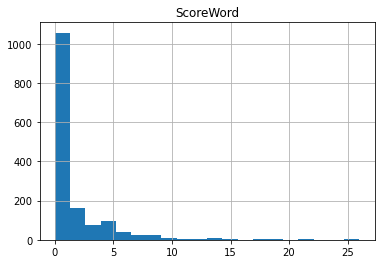

In [288]:
print('Distribution of ScoreWord:')

plt=df.hist(column='ScoreWord', bins=20)

<AxesSubplot:title={'center':'Means of amount collected'}, ylabel='Categorie'>

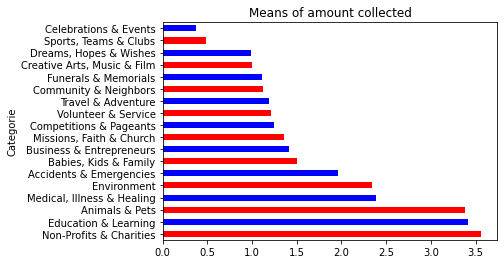

In [325]:
df.groupby('Categorie')['ScoreWord'].mean().nlargest(n).plot.barh(color=['r','b'],title='Means of amount collected')

## III.3 What are the important factors in the success of a collect:
## OLS ANALYSIS

In [290]:
import seaborn as sn
import statsmodels.api as sm
import matplotlib.pyplot as plt


def OLS_per_category_with_keywords(cat,covariates):
    
    df2=df.loc[df['Categorie']==cat]

###KEYWORDS
    #Create columns "description contains or not the keyword"
    for keyword in motclé_dict[cat]:
        list=[]
        for collect_description in df2['Short_description']:
            if keyword in collect_description:
                list.append(1)
            else:
                list.append(0)
        df2[keyword]=list
    
### CORRELATION MATRIX
    plt.figure(figsize=(10,10))
    corrMatrix = df2[covariates+motclé_dict[cat]+['Amount collected ']].corr()
    sn.heatmap(corrMatrix, annot=True, square=True).set_title(cat+" Correlation matrix with Amount Collected, keywords and "+(str(covariates)))



###OLS
    X = df2[covariates+(motclé_dict[cat])]
    Y=df2['Pourcentage Raised']

    model = sm.OLS(Y, X)
    results = model.fit()
    #print(results.params)
    
    #OLS PLOT
    fig, ax = plt.subplots(figsize=(6,6))
    fig = sm.graphics.plot_fit(results, 0, ax=ax)
    ax.set_ylabel("Amount collected")
    ax.set_xlabel(covariates)
    ax.set_title(cat+"OlS Regression with keywords and "+(str(covariates)))
    
    print(results.summary())
    
####################



def OLS_per_category(cat,covariates):
    
    df2=df.loc[df['Categorie']==cat]
### CORRELATION MATRIX
    plt.figure(figsize=(5,5))
    corrMatrix = df2[covariates+['Amount collected ']].corr()
    sn.heatmap(corrMatrix, annot=True, square=True).set_title(cat+" Correlation matrix with Amount Collected, keywords and "+(str(covariates)))



###OLS
    X = df2[covariates]
    Y=df2['Amount collected ']

    model = sm.OLS(Y, X)
    results = model.fit()
    #print(results.params)
    
    #OLS PLOT
    fig, ax = plt.subplots(figsize=(6,6))
    fig = sm.graphics.plot_fit(results, 0, ax=ax)
    ax.set_ylabel("Amount collected")
    ax.set_xlabel(covariates)
    ax.set_title(cat+" OlS Regression with keywords and "+(str(covariates)))
    
    print(results.summary())

def OLS(covariates):
    
    ### CORRELATION MATRIX
    plt.figure(figsize=(5,5))
    corrMatrix = df[covariates+['Amount collected ']].corr()
    sn.heatmap(corrMatrix, annot=True, square=True).set_title(cat+" Correlation matrix with Amount Collected, keywords and "+(str(covariates)))



###OLS
    X = df[covariates]
    Y=df['Amount collected ']

    model = sm.OLS(Y, X)
    results = model.fit()
    #print(results.params)
    
    #OLS PLOT
    fig, ax = plt.subplots(figsize=(6,6))
    fig = sm.graphics.plot_fit(results, 0, ax=ax)
    ax.set_ylabel("Amount collected")
    ax.set_xlabel(covariates)
    ax.set_title(cat+" OlS Regression with keywords and "+(str(covariates)))
    
    print(results.summary())
    

In [291]:
dict_category

{0: 'Medical, Illness & Healing',
 1: 'Funerals & Memorials',
 2: 'Accidents & Emergencies',
 3: 'Non-Profits & Charities',
 4: 'Education & Learning',
 5: 'Animals & Pets',
 6: 'Environment',
 7: 'Business & Entrepreneurs',
 8: 'Community & Neighbors',
 9: 'Competitions & Pageants',
 10: 'Creative Arts, Music & Film',
 11: 'Celebrations & Events',
 12: 'Missions, Faith & Church',
 13: 'Babies, Kids & Family',
 14: 'Sports, Teams & Clubs',
 15: 'Travel & Adventure',
 16: 'Volunteer & Service',
 17: 'Dreams, Hopes & Wishes',
 18: 'Other'}

                                 OLS Regression Results                                
Dep. Variable:      Amount collected    R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              271.7
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    3.75e-37
Time:                        19:32:06   Log-Likelihood:                         -930.00
No. Observations:                  85   AIC:                                      1864.
Df Residuals:                      83   BIC:                                      1869.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

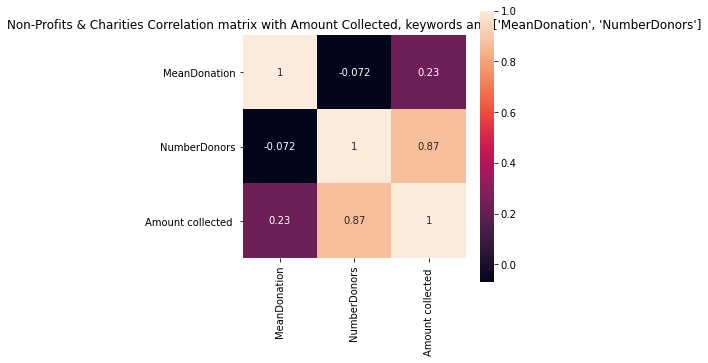

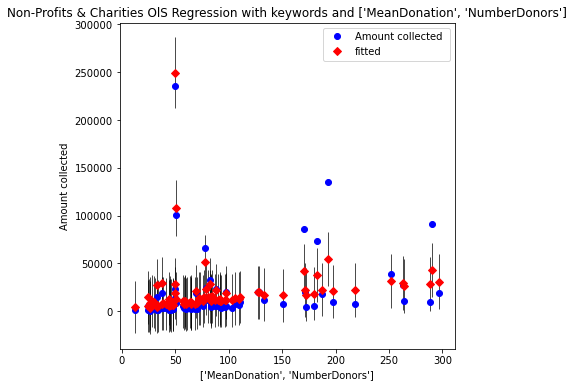

In [292]:
OLS_per_category(dict_category[3],['MeanDonation','NumberDonors'])

### Obviously, the greater the mean donation and number of donators of a collect are , the more successful is the collect

                                 OLS Regression Results                                
Dep. Variable:      Amount collected    R-squared (uncentered):                   0.349
Model:                            OLS   Adj. R-squared (uncentered):              0.341
Method:                 Least Squares   F-statistic:                              44.99
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    2.16e-09
Time:                        19:32:06   Log-Likelihood:                         -997.67
No. Observations:                  85   AIC:                                      1997.
Df Residuals:                      84   BIC:                                      2000.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

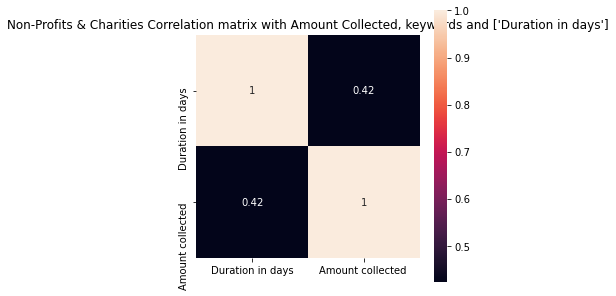

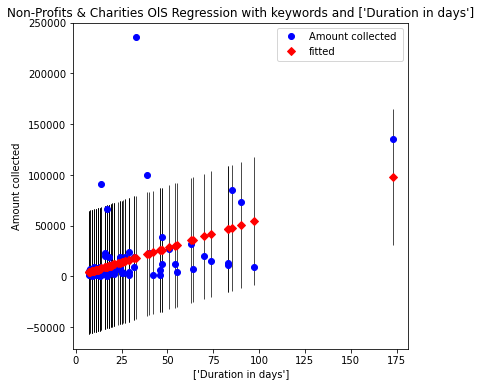

In [293]:
OLS_per_category(dict_category[3],['Duration in days'])

### The correlation between 'Duration in days' and the amount collected is low but globally, the longer, the better 

                                 OLS Regression Results                                
Dep. Variable:      Amount collected    R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.097
Method:                 Least Squares   F-statistic:                              10.14
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                     0.00203
Time:                        19:32:06   Log-Likelihood:                         -1011.0
No. Observations:                  85   AIC:                                      2024.
Df Residuals:                      84   BIC:                                      2027.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

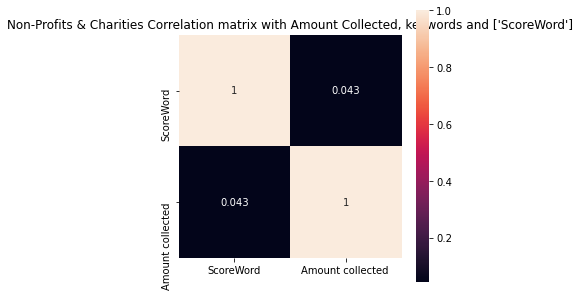

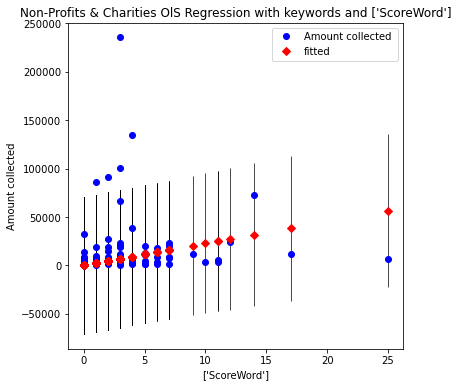

In [294]:
OLS_per_category(dict_category[3],['ScoreWord'])

<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.463
Method:                 Least Squares   F-statistic:                              6.627
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    4.05e-08
Time:                        22:23:44   Log-Likelihood:                         -449.88
No. Observations:                  85   AIC:                                      925.8
Df Residuals:                      72   BIC:                                      957.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

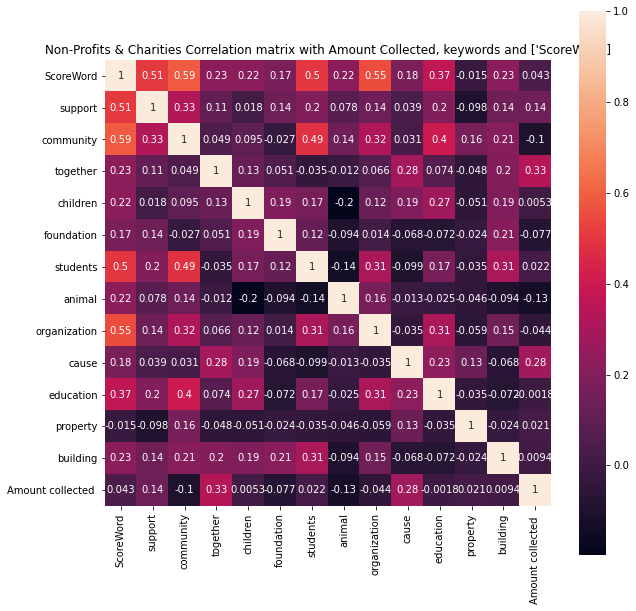

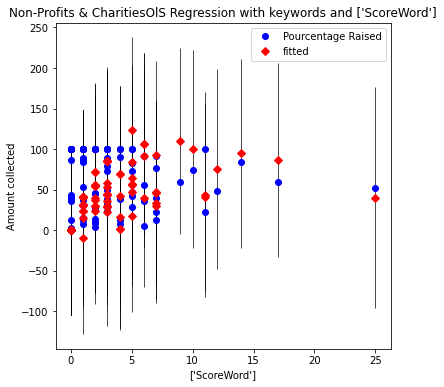

In [328]:
OLS_per_category_with_keywords(dict_category[3],['ScoreWord'])

<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.457
Method:                 Least Squares   F-statistic:                              6.113
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    9.57e-08
Time:                        19:32:06   Log-Likelihood:                         -449.71
No. Observations:                  85   AIC:                                      927.4
Df Residuals:                      71   BIC:                                      961.6
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

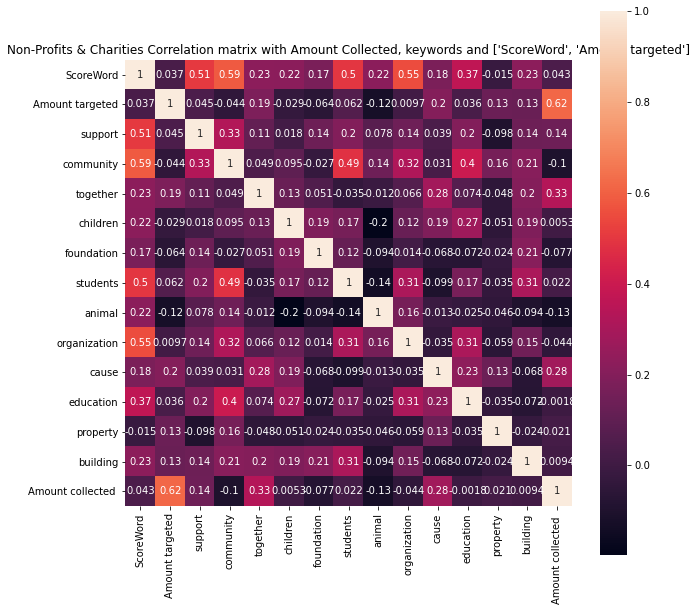

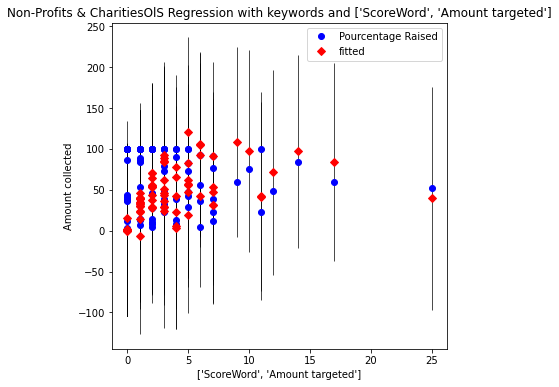

In [295]:
OLS_per_category_with_keywords(dict_category[3],['ScoreWord', 'Amount targeted'])


                                 OLS Regression Results                                
Dep. Variable:      Amount collected    R-squared (uncentered):                   0.376
Model:                            OLS   Adj. R-squared (uncentered):              0.375
Method:                 Least Squares   F-statistic:                              305.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                   4.62e-155
Time:                        19:32:07   Log-Likelihood:                         -15749.
No. Observations:                1523   AIC:                                  3.150e+04
Df Residuals:                    1520   BIC:                                  3.152e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

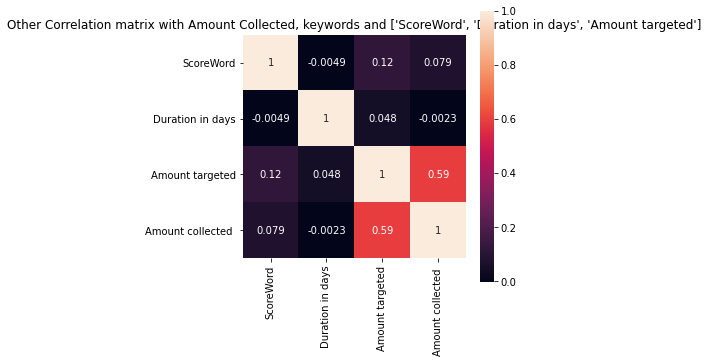

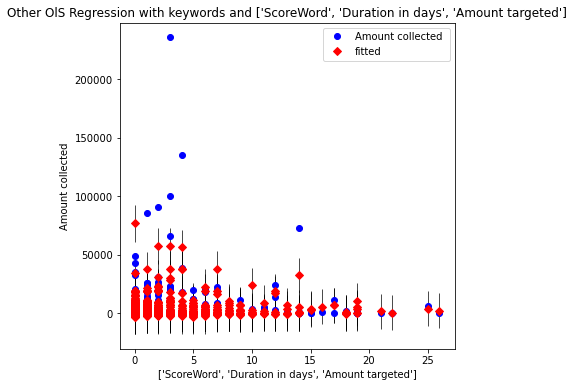

In [296]:
OLS(['ScoreWord','Duration in days','Amount targeted'])

# APPENDIX 

### Run OLS for all categories:

Medical, Illness & Healing
                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              3.571
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    0.000235
Time:                        19:32:08   Log-Likelihood:                         -428.94
No. Observations:                  87   AIC:                                      883.9
Df Residuals:                      74   BIC:                                      915.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
------------

<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/Users/albandhauthuille/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.483
Model:                            OLS   Adj. R-squared (uncentered):              0.415
Method:                 Least Squares   F-statistic:                              7.097
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    8.91e-08
Time:                        19:32:08   Log-Likelihood:                         -439.34
No. Observations:                  86   AIC:                                      898.7
Df Residuals:                      76   BIC:                                      923.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.463
Method:                 Least Squares   F-statistic:                              6.627
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    4.05e-08
Time:                        19:32:08   Log-Likelihood:                         -449.88
No. Observations:                  85   AIC:                                      925.8
Df Residuals:                      72   BIC:                                      957.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.348
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                              3.638
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    0.000376
Time:                        19:32:08   Log-Likelihood:                         -436.88
No. Observations:                  86   AIC:                                      895.8
Df Residuals:                      75   BIC:                                      922.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/Users/albandhauthuille/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.098
Model:                            OLS   Adj. R-squared (uncentered):             -0.036
Method:                 Least Squares   F-statistic:                             0.7317
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                       0.705
Time:                        19:32:09   Log-Likelihood:                         -376.12
No. Observations:                  85   AIC:                                      774.2
Df Residuals:                      74   BIC:                                      801.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.128
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.005
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                       0.450
Time:                        19:32:09   Log-Likelihood:                         -420.34
No. Observations:                  86   AIC:                                      862.7
Df Residuals:                      75   BIC:                                      889.7
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
<ipython-input-290-36a56e8c6508>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.189
Method:                 Least Squares   F-statistic:                              3.508
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                     0.00164
Time:                        19:32:09   Log-Likelihood:                         -409.46
No. Observations:                  86   AIC:                                      834.9
Df Residuals:                      78   BIC:                                      854.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/Users/albandhauthuille/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list



Babies, Kids & Family
                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.133
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              1.100
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                       0.374
Time:                        19:32:09   Log-Likelihood:                         -391.55
No. Observations:                  82   AIC:                                      803.1
Df Residuals:                      72   BIC:                                      827.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------

/Users/albandhauthuille/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.288
Model:                            OLS   Adj. R-squared (uncentered):              0.224
Method:                 Least Squares   F-statistic:                              4.509
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    0.000292
Time:                        19:32:10   Log-Likelihood:                         -424.06
No. Observations:                  85   AIC:                                      862.1
Df Residuals:                      78   BIC:                                      879.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/albandhauthuille/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
<ipython-input-290-36a56e8c6508>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/Users/albandhauthuille/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/albandhauthuille/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


ValueError: zero-size array to reduction operation maximum which has no identity

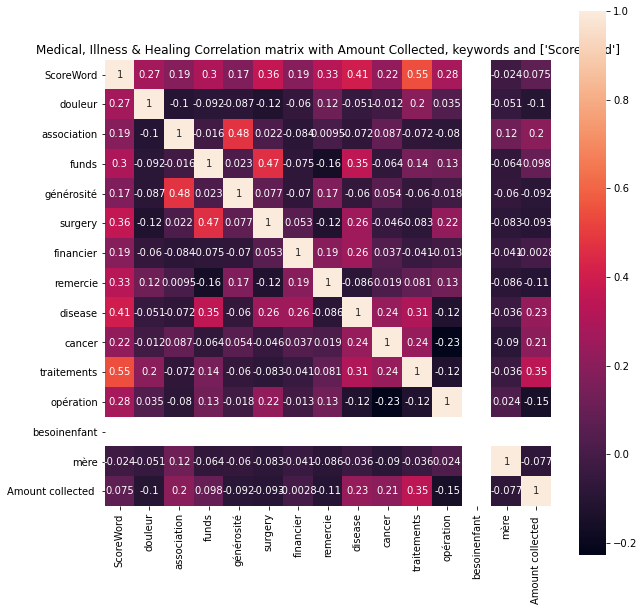

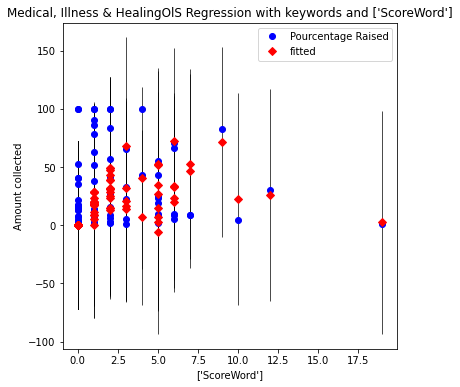

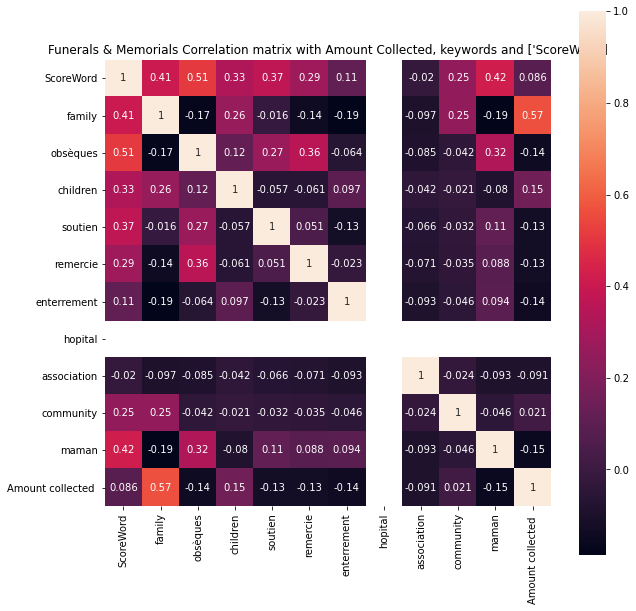

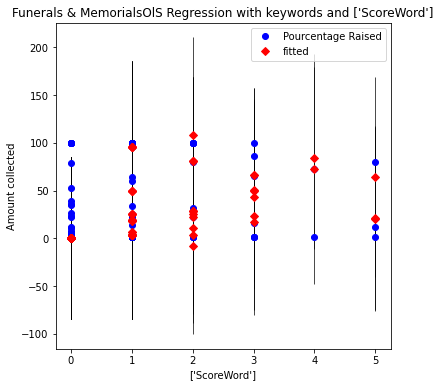

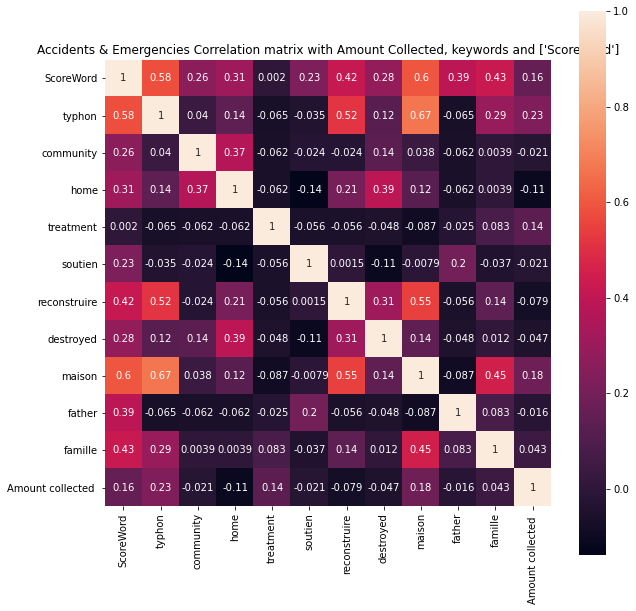

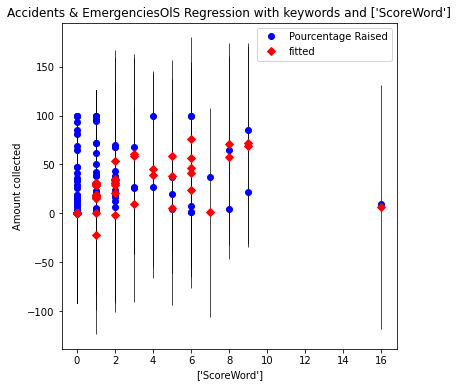

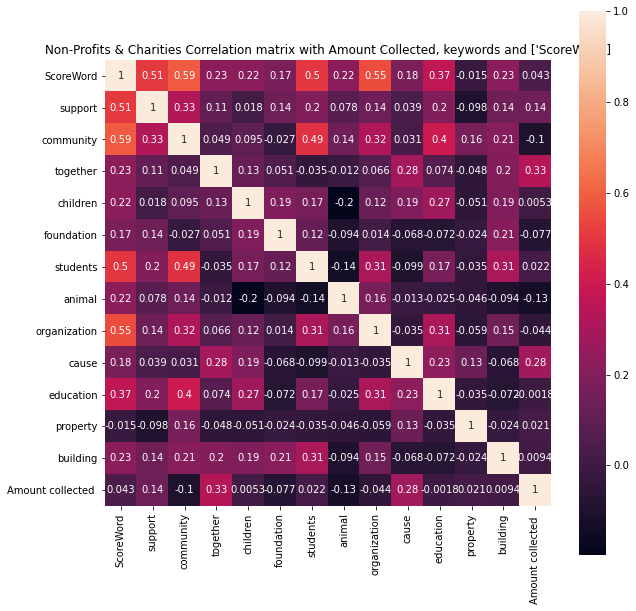

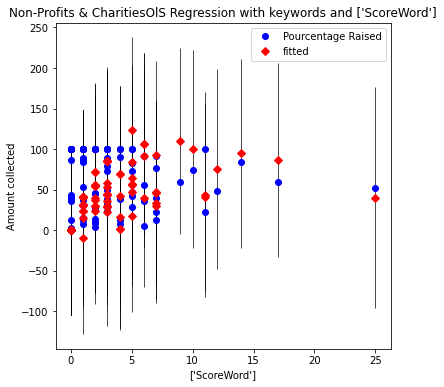

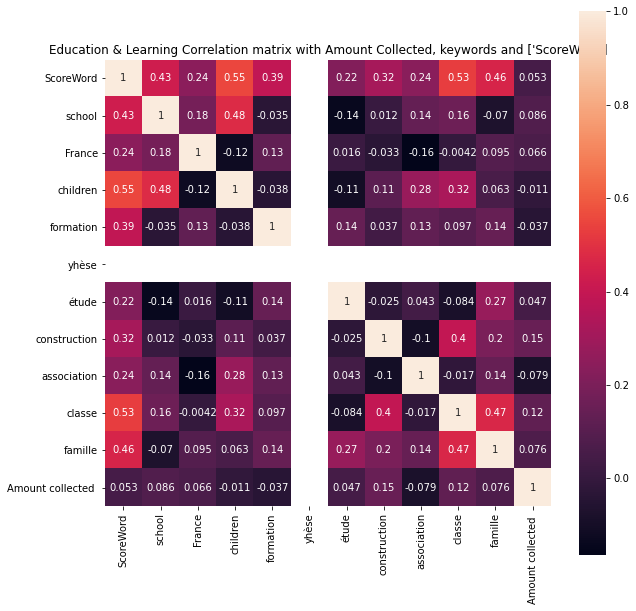

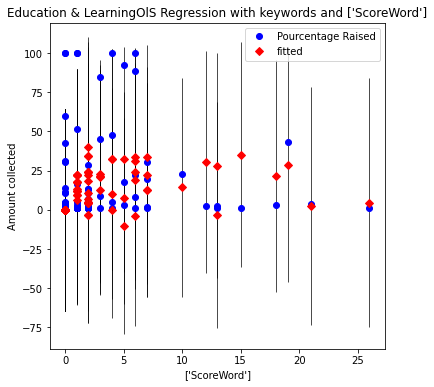

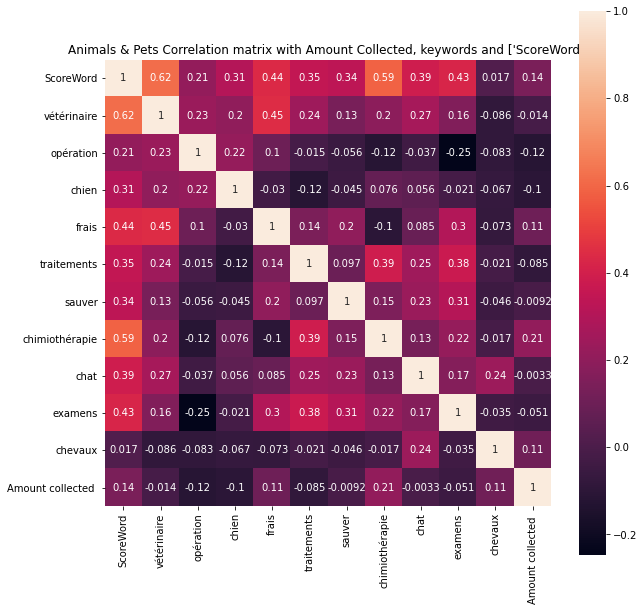

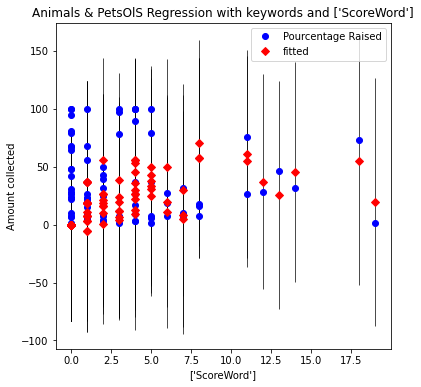

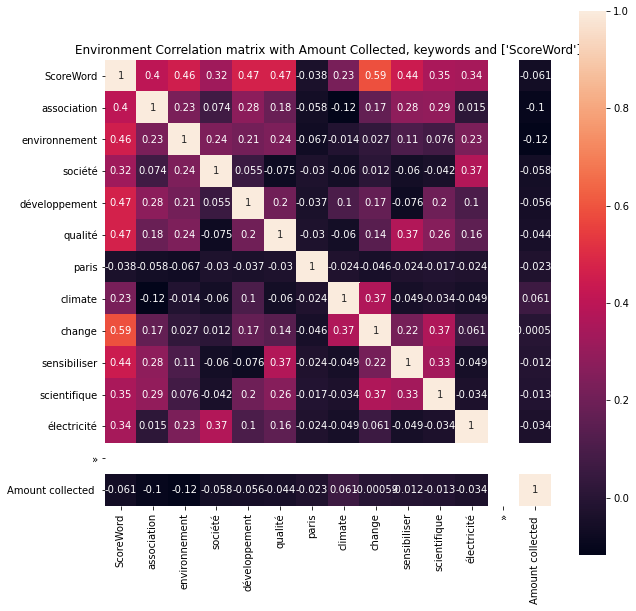

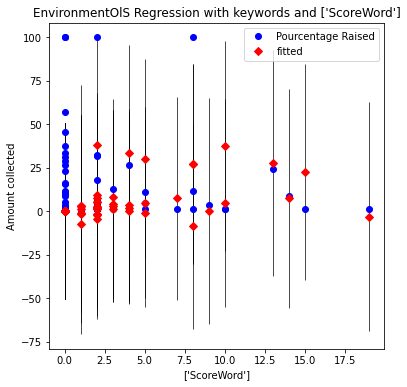

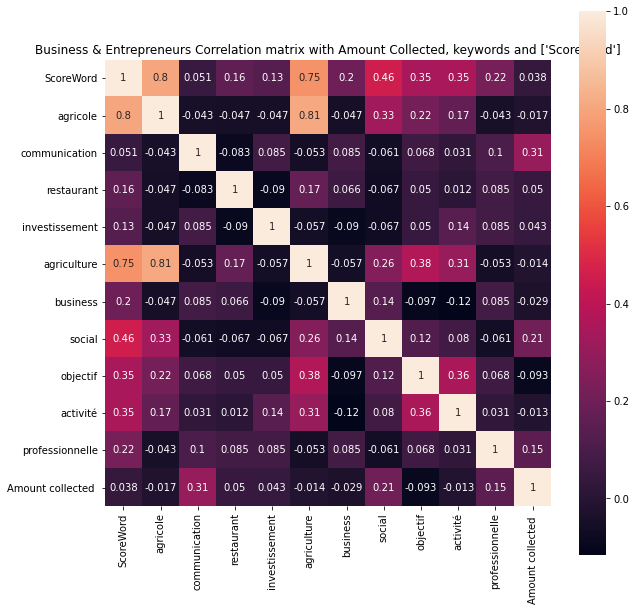

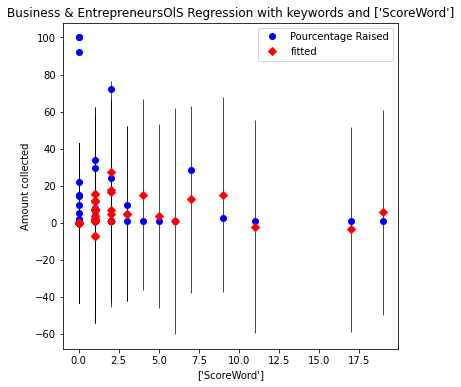

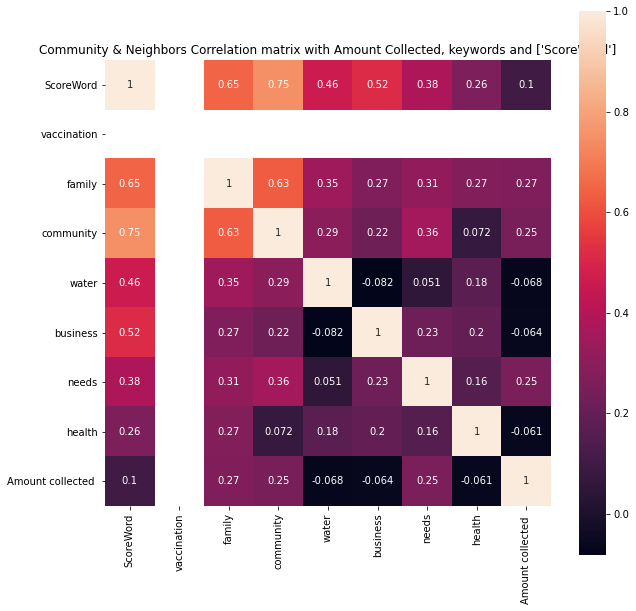

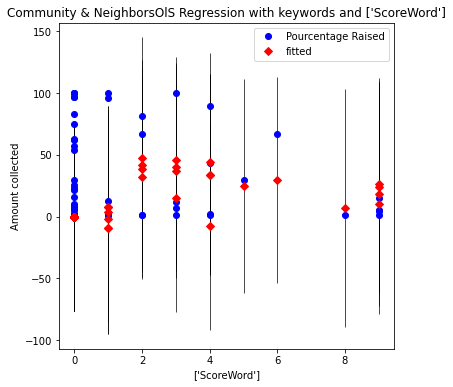

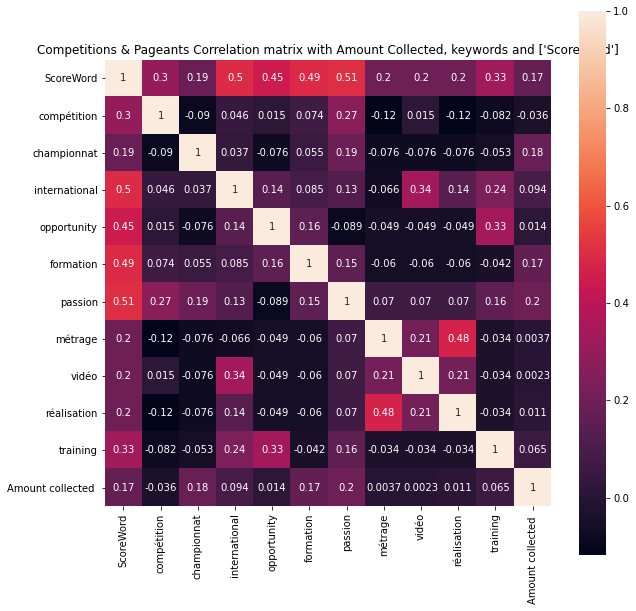

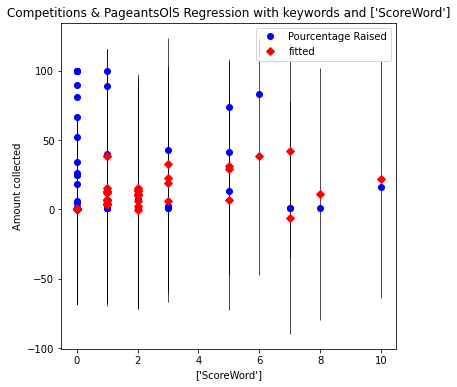

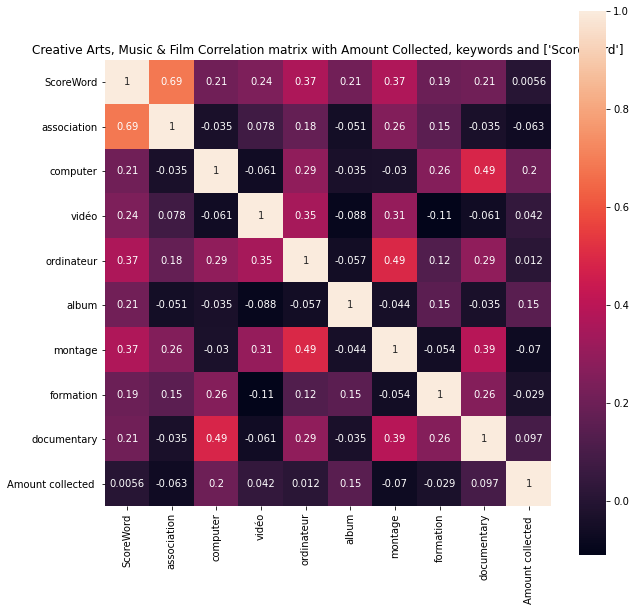

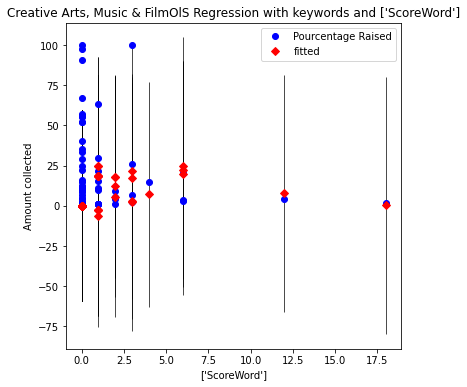

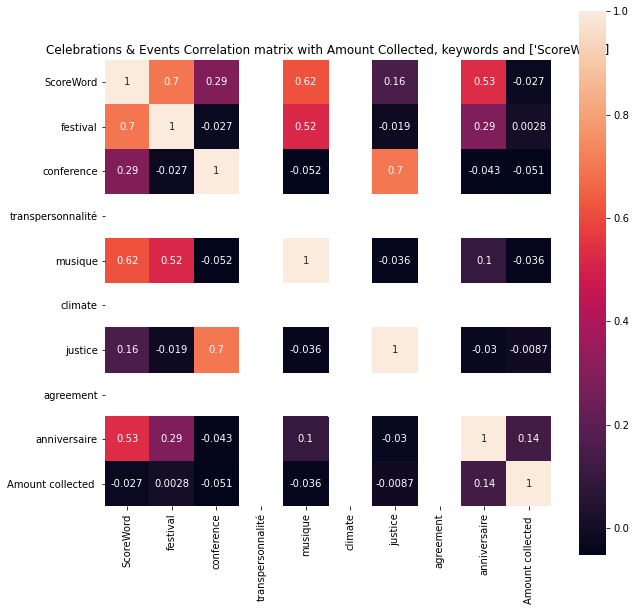

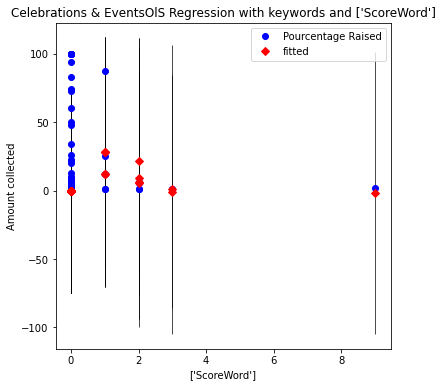

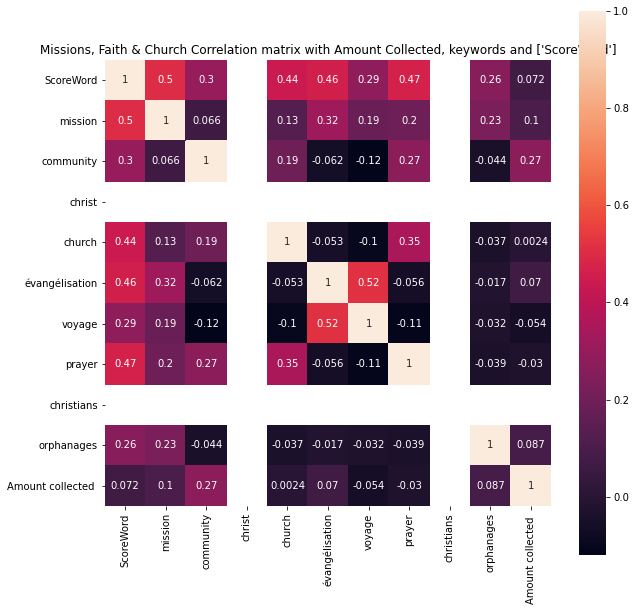

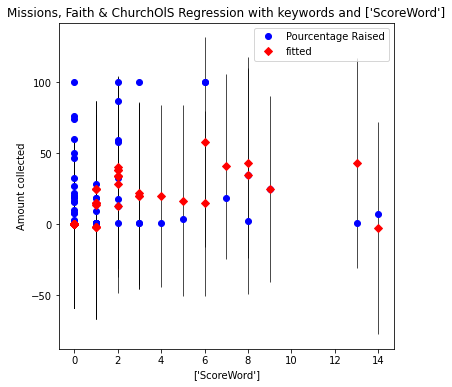

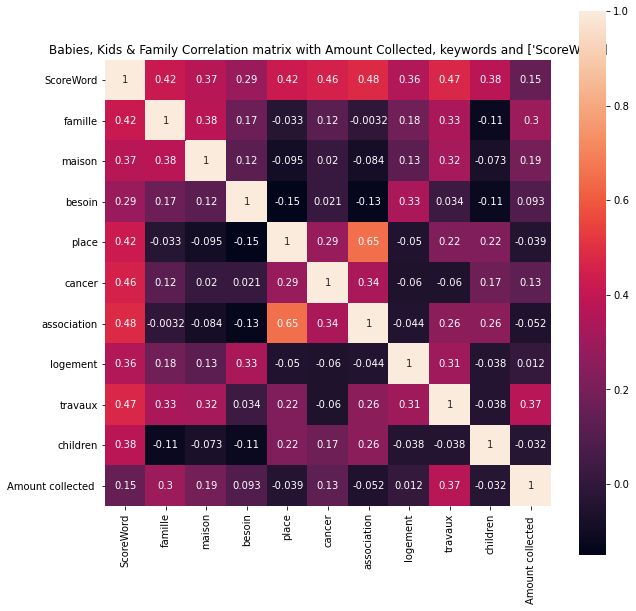

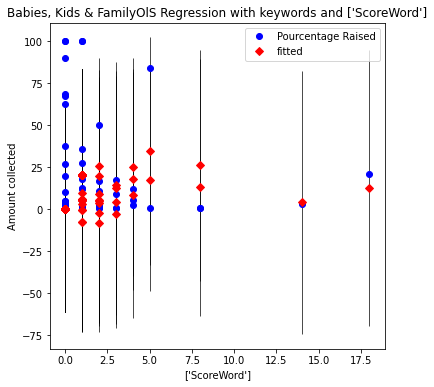

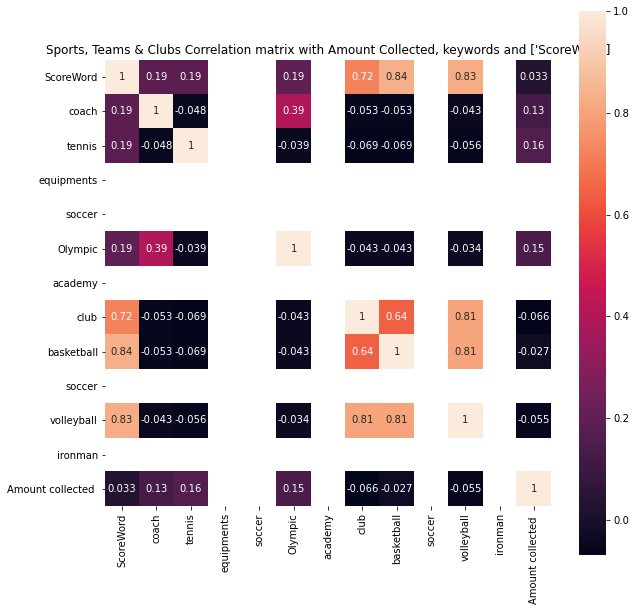

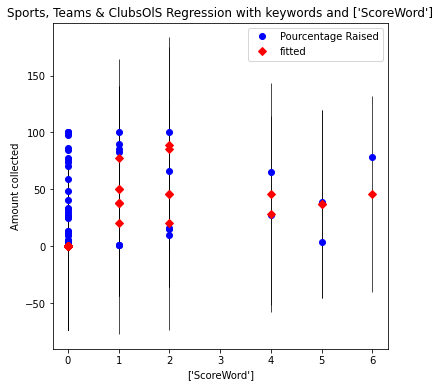

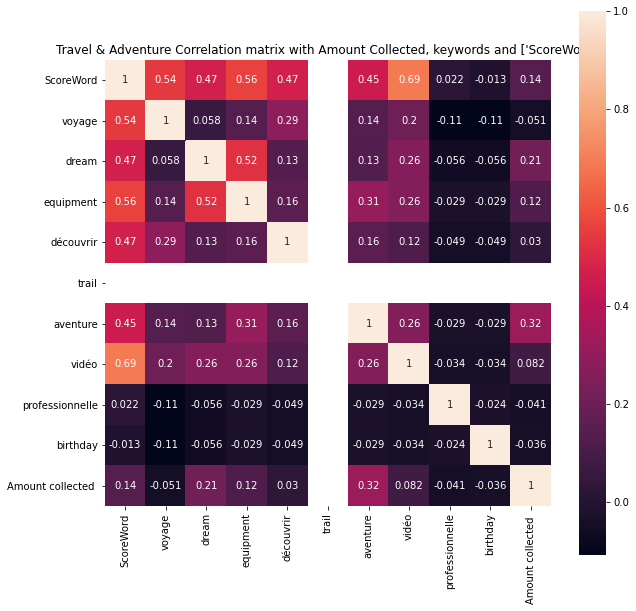

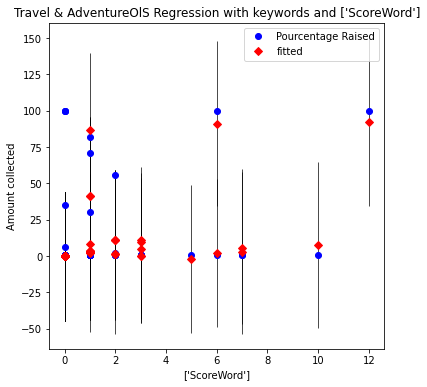

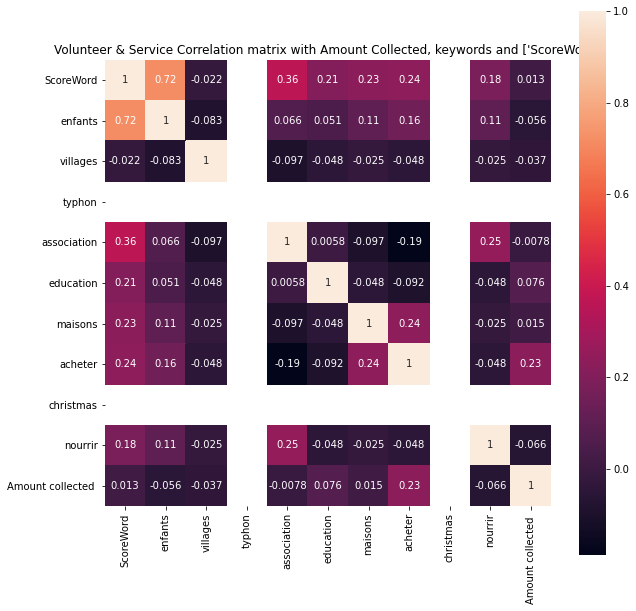

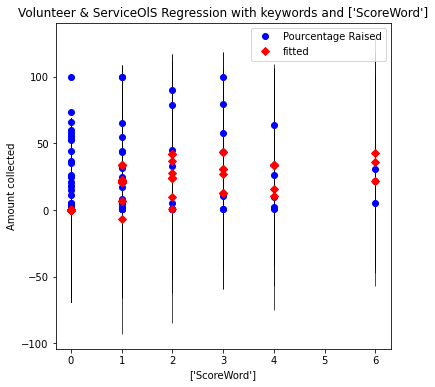

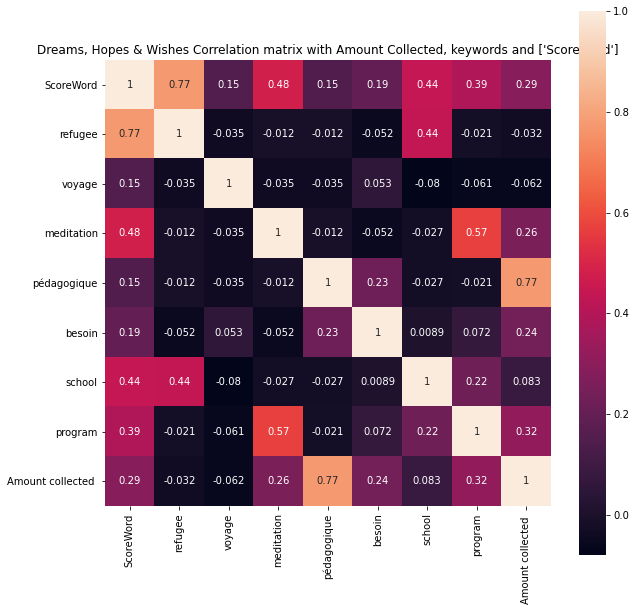

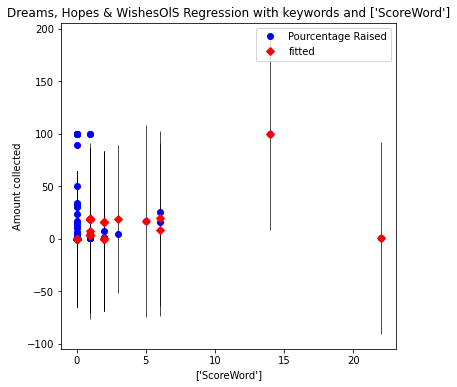

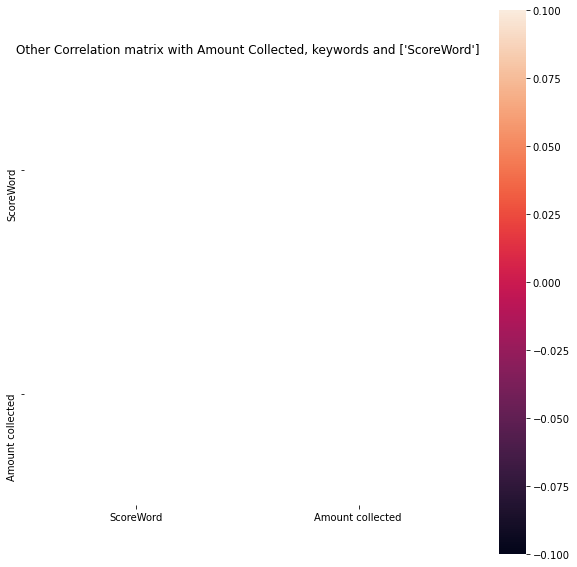

In [297]:
for cat in catégorie:
    print(cat)
    OLS_per_category_with_keywords(cat,['ScoreWord'])

In [ ]:
for i in range (n-1):
    df.loc[df['Categorie']==dict_category[i]]['Pourcentage Raised'].plot.box()
    plt.title(catégorie[i])
    plt.show()

### Influence of the category

                            OLS Regression Results                            
Dep. Variable:      Amount collected    R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     18.47
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           6.46e-51
Time:                        20:15:19   Log-Likelihood:                -15935.
No. Observations:                1523   AIC:                         3.191e+04
Df Residuals:                    1505   BIC:                         3.200e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, ' OlS Regression with the category')

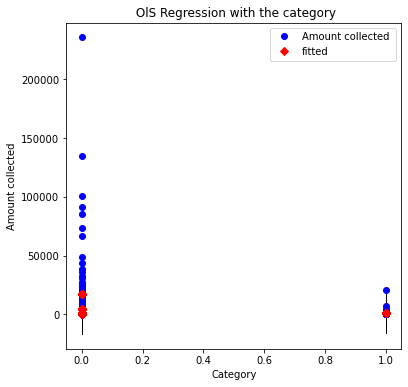

In [317]:
df3=pd.get_dummies(df[['Categorie','Amount collected ']])
df3


X = df3.iloc[:,1:]
Y=df3['Amount collected ']

model = sm.OLS(Y, X)
results = model.fit()
    #print(results.params)
print(results.summary())
    #OLS PLOT
fig, ax = plt.subplots(figsize=(6,6))
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Amount collected")
ax.set_xlabel('Category')
ax.set_title(" OlS Regression with the category")
    


                            OLS Regression Results                            
Dep. Variable:      Amount collected    R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     7.619
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          2.95e-142
Time:                        22:01:05   Log-Likelihood:                -14326.
No. Observations:                1523   AIC:                         3.030e+04
Df Residuals:                     698   BIC:                         3.470e+04
Df Model:                         824                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Text(0.5, 1.0, ' OlS Regression with the town')

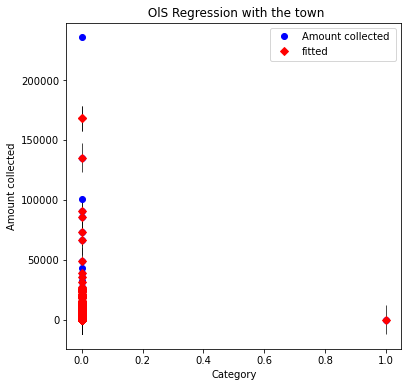

In [327]:
df3=pd.get_dummies(df[['town','Amount collected ']])
df3

X = df3.iloc[:,1:]
Y=df3['Amount collected ']

model = sm.OLS(Y, X)
results = model.fit()
    #print(results.params)
print(results.summary())
    #OLS PLOT
fig, ax = plt.subplots(figsize=(6,6))
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Amount collected")
ax.set_xlabel('Category')
ax.set_title(" OlS Regression with the town")